# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
# Separando as colunas relevantes para facilitar a leitura e o tratamento
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE' , 'IDADEPAI', 'DTNASC' , 'ESCMAE', 'PESO' , 'SEXO','QTDFILVIVO', 'GESTACAO', 'PARTO' ]]
sinasc_1.head()

,munResNome,IDADEMAE,IDADEPAI,DTNASC,ESCMAE,PESO,SEXO,QTDFILVIVO,GESTACAO,PARTO
0,Alta Floresta D'Oeste,19,26.0,2019-02-19,8 a 11 anos,3685,Masculino,0.0,37 a 41 semanas,Cesáreo
1,Alta Floresta D'Oeste,29,24.0,2019-02-21,8 a 11 anos,3055,Feminino,1.0,37 a 41 semanas,Cesáreo
2,Alta Floresta D'Oeste,37,32.0,2019-02-25,8 a 11 anos,3460,Feminino,2.0,37 a 41 semanas,Cesáreo
3,Alto Alegre dos Parecis,30,24.0,2019-03-20,12 anos ou mais,2982,Feminino,0.0,37 a 41 semanas,Cesáreo
4,Alta Floresta D'Oeste,30,27.0,2019-03-23,8 a 11 anos,3310,Feminino,1.0,37 a 41 semanas,Cesáreo


In [6]:
# Verificando se tem missing values
sinasc_1.isnull().sum()

munResNome        0
IDADEMAE          0
IDADEPAI      19421
DTNASC            0
ESCMAE          312
PESO              0
SEXO              4
QTDFILVIVO     1573
GESTACAO       1232
PARTO            49
dtype: int64

In [7]:
# Retirando os NaN
sinasc_1 = sinasc_1.dropna()

In [8]:
# Agrupando por nome do município e calculando a média das idades dos pais
idade_media = sinasc_1.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()
idade_media


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,26.003378,29.601351
Alto Alegre dos Parecis,24.676692,29.233083
Alto Paraíso,22.833333,28.833333
Alvorada D'Oeste,26.702128,30.436170
Ariquemes,28.333333,32.583333
Buritis,25.458333,32.145833
Cabixi,32.166667,34.333333
Cacaulândia,31.000000,36.333333
Cacoal,26.993641,30.937202


<Axes: title={'center': 'A idade média da mãe e do pai'}, xlabel='Município'>

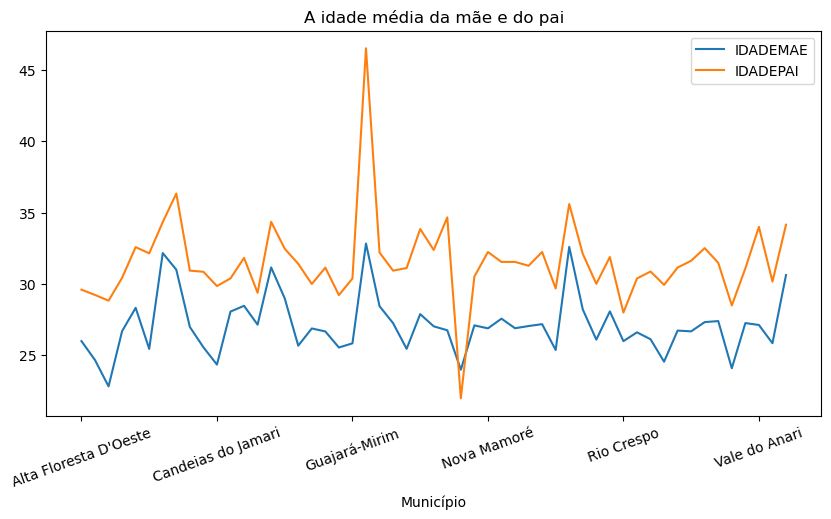

In [9]:
idade_media.plot(figsize=[10, 5], title = 'A idade média da mãe e do pai', xlabel = 'Município', rot = 20)


In [10]:
idade_media.describe()

,IDADEMAE,IDADEPAI
count,53.000000,53.000000
mean,27.129605,31.546582
std,2.085923,3.026001
min,22.833333,22.000000
25%,25.853659,30.170732
50%,26.904762,31.152174
75%,27.890411,32.243243
max,32.833333,46.500000


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

### O dia do meu aniversário é 22/10

In [11]:
# Convertendo a coluna 'DTNASC' para o formato de data
sinasc_1['DTNASC'] = pd.to_datetime(sinasc_1['DTNASC'])

# Filtrando os dados para o dia 22/10
df_22_10 = sinasc_1[(sinasc_1['DTNASC'].dt.day == 22) & (sinasc_1['DTNASC'].dt.month == 10)]

# Exibindo os dados filtrados
df_22_10

,munResNome,IDADEMAE,IDADEPAI,DTNASC,ESCMAE,PESO,SEXO,QTDFILVIVO,GESTACAO,PARTO
15557,Cacoal,29,36.0,2019-10-22,8 a 11 anos,3390,Feminino,2.0,37 a 41 semanas,Cesáreo
15558,Pimenta Bueno,25,40.0,2019-10-22,8 a 11 anos,4040,Feminino,0.0,37 a 41 semanas,Cesáreo
15649,Cacoal,24,28.0,2019-10-22,12 anos ou mais,3350,Feminino,0.0,37 a 41 semanas,Cesáreo
15650,Presidente Médici,30,36.0,2019-10-22,12 anos ou mais,3645,Feminino,1.0,37 a 41 semanas,Cesáreo
15979,Cerejeiras,22,23.0,2019-10-22,4 a 7 anos,3725,Feminino,1.0,37 a 41 semanas,Vaginal
15980,Cerejeiras,24,35.0,2019-10-22,8 a 11 anos,2980,Masculino,0.0,37 a 41 semanas,Cesáreo
16157,Espigão D'Oeste,29,35.0,2019-10-22,8 a 11 anos,3960,Masculino,1.0,37 a 41 semanas,Cesáreo
18009,Ji-Paraná,32,40.0,2019-10-22,8 a 11 anos,3295,Masculino,3.0,37 a 41 semanas,Cesáreo
18518,Machadinho D'Oeste,31,32.0,2019-10-22,8 a 11 anos,3750,Feminino,1.0,37 a 41 semanas,Cesáreo
19124,Ouro Preto do Oeste,35,30.0,2019-10-22,12 anos ou mais,3155,Masculino,1.0,37 a 41 semanas,Cesáreo


In [12]:
 # Agrupar por sexo e faixa de escolaridade da mãe, calculando a média de peso
media_peso_sexo_escolaridade = df_22_10.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

In [13]:
# Mostrando o resultado
media_peso_sexo_escolaridade

,SEXO,ESCMAE,PESO
0,Feminino,12 anos ou mais,3398.750000
1,Feminino,4 a 7 anos,3725.000000
2,Feminino,8 a 11 anos,3726.666667
3,Masculino,12 anos ou mais,3345.000000
4,Masculino,8 a 11 anos,3418.750000


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [14]:
# Vamos achar o município com menos bêbês
sinasc_1.groupby('munResNome')['SEXO'].count().sort_values()

munResNome
Rio Crespo                      1
Município ignorado - RO         1
Pimenteiras do Oeste            5
Itapuã do Oeste                 6
Alto Paraíso                    6
Cabixi                          6
Cacaulândia                     6
Governador Jorge Teixeira       9
Cujubim                         9
Theobroma                      10
Ariquemes                      12
Guajará-Mirim                  13
Candeias do Jamari             14
Vale do Anari                  15
Corumbiara                     17
Campo Novo de Rondônia         21
Monte Negro                    21
Chupinguaia                    26
Castanheiras                   28
Nova Mamoré                    29
Colorado do Oeste              31
Seringueiras                   32
São Francisco do Guaporé       35
Primavera de Rondônia          36
Parecis                        37
Vale do Paraíso                41
Costa Marques                  41
Teixeirópolis                  42
São Felipe D'Oeste             46
Nov

In [15]:
sinasc_rio_crespo = sinasc_1[sinasc_1['munResNome'] == 'Rio Crespo']

In [16]:
resultado_RC = sinasc_rio_crespo.groupby(by='munResNome')[['IDADEMAE', 'IDADEPAI']].agg([('Média', 'mean'),('Máximo', 'max'), ('Mínimo','min')])
resultado_RC

IDADEMAE               IDADEPAI              
              Média Máximo Mínimo    Média Máximo Mínimo
munResNome                                              
Rio Crespo     26.0     26     26     28.0   28.0   28.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [17]:
# Identificando o município com mais bêbês nascidos no mês de março

df_marco = sinasc_1[(sinasc_1['DTNASC'].dt.month == 3)]
df_marco.groupby('munResNome')['QTDFILVIVO'].count().sort_values(ascending = False)

munResNome
Cacoal                      121
Ji-Paraná                    80
Rolim de Moura               63
Pimenta Bueno                54
Ouro Preto do Oeste          39
Porto Velho                  37
Espigão D'Oeste              27
Alta Floresta D'Oeste        23
Vilhena                      16
Buritis                      15
Urupá                        13
Machadinho D'Oeste           13
Presidente Médici            12
Alto Alegre dos Parecis       9
Alvorada D'Oeste              9
Jaru                          9
Cerejeiras                    9
Nova Mamoré                   7
Vale do Paraíso               6
Santa Luzia D'Oeste           6
Ministro Andreazza            6
Novo Horizonte do Oeste       5
Parecis                       5
Monte Negro                   5
Chupinguaia                   5
Castanheiras                  4
Primavera de Rondônia         4
Colorado do Oeste             4
São Felipe D'Oeste            4
Vale do Anari                 3
Seringueiras                 

In [18]:
sinasc_cacoal = sinasc_1[sinasc_1['munResNome'] == 'Cacoal']
sinasc_cacoal.groupby(by='munResNome')[[
    'IDADEMAE', 'IDADEPAI']].agg([(
    'Média', 'mean'),('Máximo', 'max'), (
    'Mínimo','min')])

IDADEMAE                 IDADEPAI              
                Média Máximo Mínimo      Média Máximo Mínimo
munResNome                                                  
Cacoal      26.993641     47     14  30.937202   66.0   17.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

# <span style="color:green"> INSIGHTS

Esses dados sobre as idades de mães e pais em dois municípios, Cacoal e Rio Crespo, fornecem alguns insights importantes sobre a demografia e as características dos pais nesses locais:

1. **Diferença de Idade entre Mães e Pais**:
   - Em ambos os municípios, a idade média dos pais é maior que a das mães, com uma diferença significativa em Cacoal (pais com média de 30,9 anos e mães com média de 27 anos). Essa diferença sugere que, em média, os pais tendem a ser mais velhos que as mães nesses locais.
   - Em Rio Crespo, essa diferença é menor (média de 28 anos para pais e 26 anos para mães), indicando uma menor disparidade de idade entre os pais.

2. **Variação na Idade das Mães e Pais em Cacoal**:
   - Em Cacoal, as idades das mães variam bastante (de 14 a 47 anos), assim como a dos pais (de 17 a 66 anos). Esse intervalo amplo pode indicar uma diversidade na idade em que as pessoas se tornam pais, sugerindo tanto uma prevalência de maternidade/paternidade em idade jovem quanto em idade mais avançada.
   - A presença de mães muito jovens (14 anos) pode levantar questões sobre gravidez na adolescência e possíveis necessidades de políticas públicas para educação e apoio familiar.

3. **Uniformidade em Rio Crespo**:
   - Em contraste, Rio Crespo apresenta uma uniformidade absoluta nas idades reportadas, com todas as mães tendo 26 anos e todos os pais, 28 anos. Isso pode indicar uma amostra pequena ou uma característica demográfica peculiar dessa localidade para os dados analisados.
   - Esse padrão é incomum e pode sugerir que se trata de um subconjunto específico de nascimentos ou mesmo uma amostragem de um grupo demograficamente homogêneo.

4. **Possível Diferença na Distribuição Etária de Pais por Localidade**:
   - Em Cacoal, o alto valor máximo da idade dos pais (66 anos) sugere que há casos de paternidade em idade avançada, enquanto em Rio Crespo não se observa essa variação.
   - Essa diferença pode estar relacionada a aspectos culturais ou socioeconômicos que influenciam a idade na qual as pessoas se tornam pais.



In [19]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [20]:
df_novo = sinasc_raw.select_dtypes(exclude=['int64','float64']).dropna().reset_index()
df_novo.head()

,index,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,101,4 a 7 anos,37 a 41 semanas,Única,Cesáreo,2019-01-15,Masculino,Parda,2019-02-08,Q699,3.2.01,2019-02-15,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,211,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-01-02,Masculino,Branca,2019-02-13,Q668,3.2.01,2019-02-21,ATIVO,MUNIC,Ariquemes,Rondônia
2,333,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-13,Feminino,Preta,2019-03-11,Q668,3.2.01,2019-03-20,ATIVO,MUNIC,Alto Paraíso,Rondônia
3,503,4 a 7 anos,37 a 41 semanas,Única,Cesáreo,2019-03-07,Masculino,Preta,2019-04-01,Q549,3.2.01,2019-04-22,ATIVO,MUNIC,Ariquemes,Rondônia
4,720,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-04-11,Feminino,Parda,2019-05-06,Q668,3.2.01,2019-05-17,ATIVO,MUNIC,Alto Paraíso,Rondônia


In [34]:
df_novo.columns

Index(['index', 'ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'DTNASC', 'SEXO',
       'RACACOR', 'DTCADASTRO', 'CODANOMAL', 'VERSAOSIST', 'DTRECEBIM',
       'munResStatus', 'munResTipo', 'munResNome', 'munResUf'],
      dtype='object')

Podemos ver que há um 

In [22]:
df_novo.GESTACAO.value_counts()

GESTACAO
37 a 41 semanas      144
32 a 36 semanas       44
28 a 31 semanas        4
42 semanas e mais      2
22 a 27 semanas        1
Name: count, dtype: int64

In [37]:
df_novo.PARTO.describe()

count         195
unique          2
top       Cesáreo
freq          144
Name: PARTO, dtype: object

In [71]:
comparacao_gestacao = df_novo.groupby('GESTACAO')[['SEXO']]
comparacao_gestacao.describe()

SEXO                       
                  count unique        top freq
GESTACAO                                      
22 a 27 semanas       1      1  Masculino    1
28 a 31 semanas       4      2  Masculino    2
32 a 36 semanas      44      2   Feminino   25
37 a 41 semanas     144      2  Masculino   88
42 semanas e mais     2      2  Masculino    1

Esses dados nos mostram a distribuição de nascimentos em diferentes faixas de idade gestacional, categorizados por sexo dos bebês, e trazem alguns insights importantes:

1. **Distribuição de Sexo por Faixa Gestacional**:
   - Em nascimentos a termo (37 a 41 semanas), observa-se uma predominância de nascimentos de bebês do sexo masculino (88 de um total de 144).
   - Para a faixa de 32 a 36 semanas, que corresponde a nascimentos prematuros tardios, há um leve predomínio de bebês do sexo feminino (25 em um total de 44).

2. **Tendência em Nascimentos de Longa Duração (42 Semanas ou Mais)**:
   - Nos nascimentos de gestação prolongada (42 semanas ou mais), o número é muito baixo, com apenas dois registros. Isso pode refletir uma menor frequência desse tipo de gestação, possivelmente devido a intervenções médicas como induções de parto.

3. **Taxa de Nascimentos Prematuros**:
   - É possível observar que os nascimentos de 28 a 31 semanas e de 22 a 27 semanas têm uma quantidade muito baixa, o que é consistente com a raridade de nascimentos extremamente prematuros. Esse padrão pode indicar o impacto das semanas de gestação na sobrevivência dos bebês, sendo os nascimentos a termo mais comuns e com menos complicações.

4. **Nascimentos a Termo Predominam**:
   - A maioria dos nascimentos está na faixa de 37 a 41 semanas (144 nascimentos), que é considerada a ideal para o desenvolvimento saudável do bebê. Isso sugere uma tendência de partos que ocorrem dentro do períotos prematuros.